<a href="https://colab.research.google.com/github/vetri00/IBM-Project-42692-1660705650/blob/main/Assignment/Vetrikondan%20A/Assignment%204/vetrikondan__a_assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement: Customer Segmentation Analysis**

###**Description:** 
*You own the mall and want to understand the customers who can quickly converge [Target Customers] so that the insight can be given to the marketing team and plan the strategy accordingly.*


# **Download and load Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as rcParams

In [ ]:
df=pd.read_csv('Mall_Customers.csv') #No Target Column - Unsupervised Machine Learning
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df = df.rename(columns = {'Annual Income (k$)': 'Annual_Income','Spending Score (1-100)': 'Spending_Score'})
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df.Age.unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [ ]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

# **Visualizations**

**Univariate Analysis**


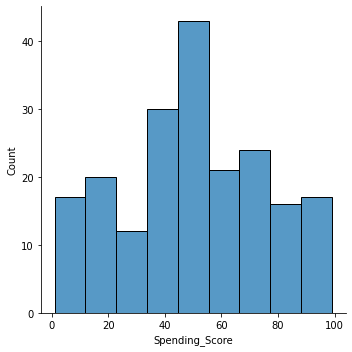

In [ ]:
sns.displot(df.Spending_Score)

([<matplotlib.patches.Wedge at 0x7f7005485ed0>,
 [Text(-0.20611945413751356, 1.080515974257694, ''),
  Text(0.24359571852615253, -1.2769734241227293, '')],
 [Text(-0.11242879316591647, 0.5893723495951058, '156.0%'),
  Text(0.14990505755455538, -0.7858297994601411, '144.0%')])

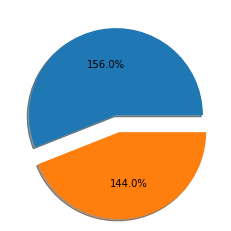

In [ ]:
plt.pie(df.Gender.value_counts(),[0,0.2],shadow='True',autopct="1%.1f%%")   #categorial column

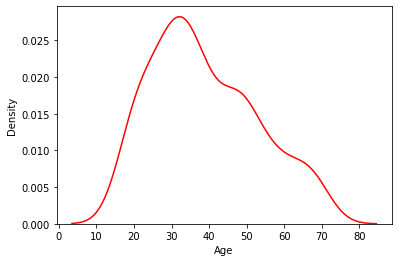

In [ ]:
sns.kdeplot(df.Age,color="red")

**Bi-variate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


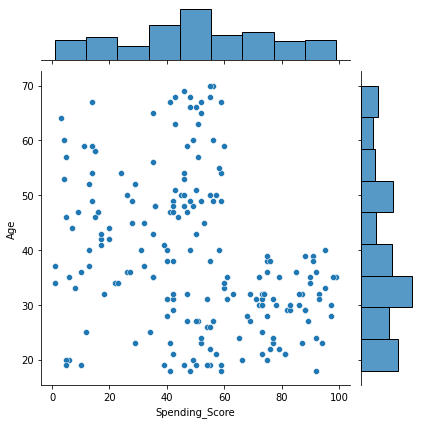

In [ ]:
sns.jointplot(df.Spending_Score,df.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


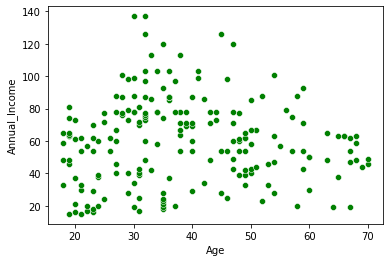

In [ ]:
sns.scatterplot(df.Age,df.Annual_Income,color="green")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'LinePlot')

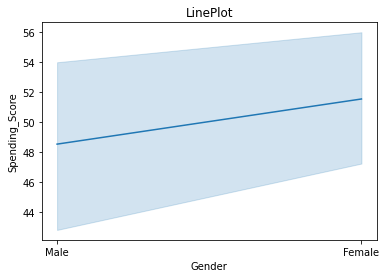

In [ ]:
sns.lineplot(df.Gender,df.Spending_Score)
plt.xlabel('Gender')
plt.ylabel('Spending_Score')
plt.title('LinePlot')

**Multi-variate Analysis**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7005203910>,
      dtype=object)

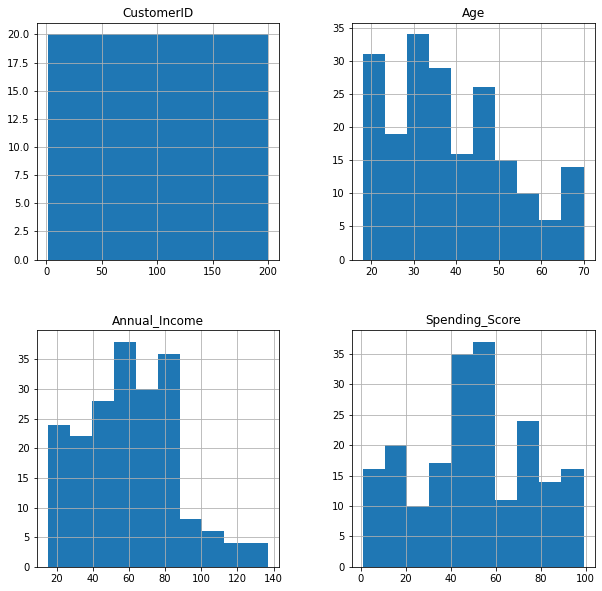

In [ ]:
df.hist(figsize=(10,10))

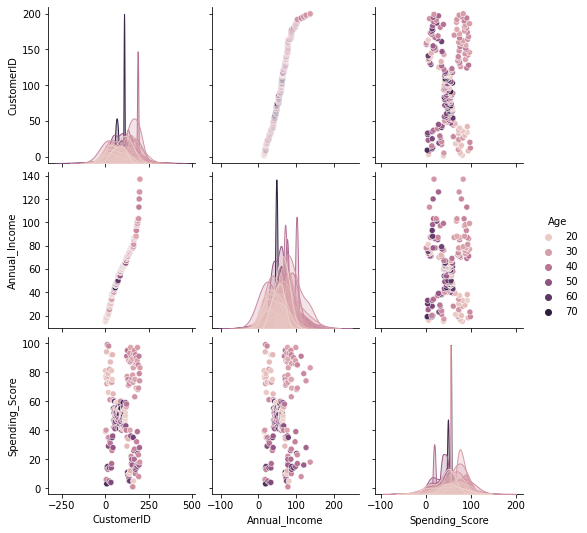

In [ ]:
sns.pairplot(df,kind='scatter',hue='Age')

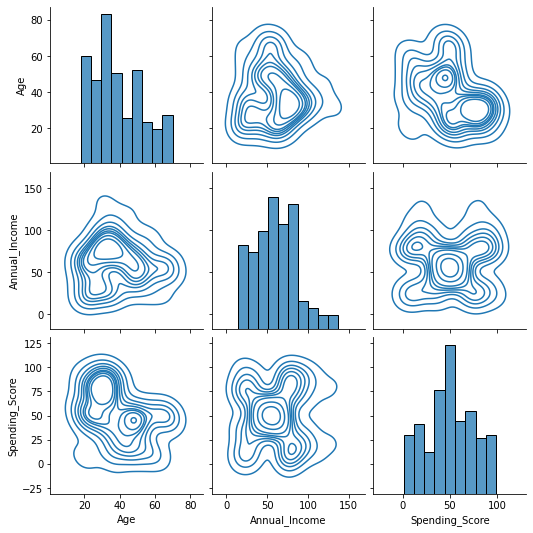

In [ ]:
sns.pairplot(data=df[['Age','Annual_Income','Spending_Score']],kind='kde',diag_kind='hist')

# **Descriptive statistics**

In [ ]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **Handle missing data**

In [ ]:
df.isnull().any() #no missing data

CustomerID        False
Gender            False
Age               False
Annual_Income     False
Spending_Score    False
dtype: bool

#**Outliers Replacement**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


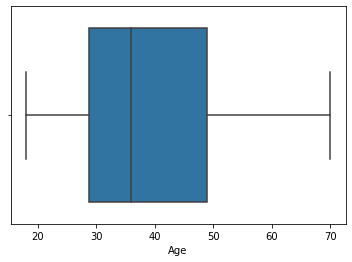

In [ ]:
sns.boxplot(df.Age) #no outliers

# **Check for Categorical column and perform encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df.Gender=le.fit_transform(df.Gender)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# **Perform clustering algorithm**

In [ ]:
from sklearn import cluster

In [ ]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df)
    error.append(kmeans.inertia_)

In [ ]:
error

[975512.0600000003,
 387065.71377137717,
 271384.508782868,
 195401.19855991466,
 157157.7579059829,
 122625.19813553878,
 103233.01724386725,
 86053.67444777445,
 76938.97565600359,
 69231.33607611558]

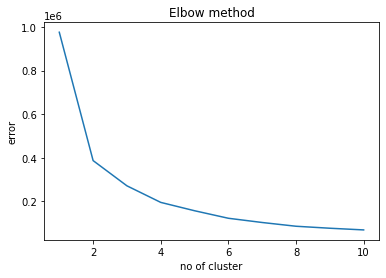

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of cluster')
plt.ylabel('error')
plt.show()

In [ ]:
k_means_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [ ]:
k_means_model.fit(df)

KMeans(n_clusters=3, random_state=0)

In [ ]:
clustered_data =k_means_model.predict(df)

# **Add the cluster data with the primary dataset**

In [ ]:
df['Clustered_data'] = pd.Series(clustered_data)
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Clustered_data
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


# **Split the data into dependent and independent variables**

In [ ]:
y=df['Clustered_data']
y                       #y - target columns

0      0
1      0
2      0
3      0
4      0
      ..
195    2
196    2
197    2
198    2
199    2
Name: Clustered_data, Length: 200, dtype: int32

In [ ]:
X=df.drop(columns=['Clustered_data'],axis=1)
X.head()                                     #X - predicting columns

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# **Scale the independent variables**



In [ ]:
from sklearn.preprocessing import scale

In [ ]:
data=pd.DataFrame(scale(X),columns=X.columns)
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980


# **Split the data into training and testing**


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape,X_test.shape

((140, 5), (60, 5))

In [ ]:
y_train.shape,y_test.shape

((140,), (60,))

# **Build the model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
model.fit(X_train,y_train)   # K - Nearest Neighbour model (KNN)

KNeighborsClassifier()

# **Train the model**


In [ ]:
pred_train = model.predict(X_train)
pred_train                            

array([1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1,
       1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2,
       0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2,
       1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 0, 1,
       0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 1, 2, 2, 1, 2, 0], dtype=int32)

# **Test the data**


In [ ]:
y_test

58     0
40     0
34     0
102    1
184    2
198    2
95     1
4      0
29     0
168    2
171    2
18     0
11     0
89     1
110    1
118    1
159    2
35     0
136    2
59     0
51     0
16     0
44     0
94     1
31     0
162    2
38     0
28     0
193    2
27     0
47     0
165    2
194    2
177    2
176    2
97     1
174    2
73     1
69     1
172    2
108    1
107    1
189    2
14     0
56     0
19     0
114    1
39     0
185    2
124    1
98     1
123    1
119    1
53     0
33     0
179    2
181    2
106    1
199    2
138    2
Name: Clustered_data, dtype: int32

In [ ]:
pred_test=model.predict(X_test)
pred_test                         

array([0, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0,
       0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 0,
       0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2], dtype=int32)

In [ ]:
pred = pd.DataFrame({'Actual_value':y_test,'Predicted_value_using_KNN':pred_test})
pred.head()

,Actual_value,Predicted_value_using_KNN
58,0,0
40,0,1
34,0,0
102,1,1
184,2,2


# **Measure the performance using metrics**





In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
#Accuracy Score
print('Training accuracy: ',accuracy_score(y_train,pred_train))
print('Testing accuracy: ',accuracy_score(y_test,pred_test))

Training accuracy:  0.9214285714285714
Testing accuracy:  0.9166666666666666


In [ ]:
#Confusion Matrix
pd.crosstab(y_test,pred_test)

col_0,0,1,2
Clustered_data,,,
0,19,4,0
1,1,16,0
2,0,0,20


In [ ]:
#Classification Report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.80      0.94      0.86        17
           2       1.00      1.00      1.00        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60

